# AR, ARIMA and Seasonal ARIMA by Day and by Month for Time Series Store forecast 
* By Alex Dance https://www.linkedin.com/in/alex-dance/
* This notebook is one of several notebooks for a project to improve store and product forecasts
1.	EDA – Exploratory Data Analysis – includes working with annual forecasts
2.	Main Modelling
3.	XG Boost modelling by Month
4.	Weighted average
5.	ARIMA – Month and Other Modelling
6.	Deep Learning

* There are a total of 6 models: AR, ARIMA and Seasonal Arima  -> By Day and By Month

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
from pylab import rcParams
import statsmodels.api as sm
import warnings
import itertools
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA

In [3]:
df = pd.read_csv(r'C:/Users/alexd/Alex Folder 1/Capstone - Store Forecast/train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
df['date'] =  pd.to_datetime(df['date'])


# Set Date as Index

In [5]:
df = df.set_index('date')

In [6]:
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [7]:
df.sales.sum()

47704512

In [8]:
salesbymonth = df.sales.resample('M').sum()

In [9]:
salesbymonth.head()

date
2013-01-31    454904
2013-02-28    459417
2013-03-31    617382
2013-04-30    682274
2013-05-31    763242
Freq: M, Name: sales, dtype: int64

In [10]:
split = "2017-01-01"

In [11]:
salesbymonth_train= salesbymonth[:split]

In [12]:
salesbymonth_train.head()

date
2013-01-31    454904
2013-02-28    459417
2013-03-31    617382
2013-04-30    682274
2013-05-31    763242
Freq: M, Name: sales, dtype: int64

In [13]:
salesbymonth_test= salesbymonth[split:]

In [14]:
salesbymonth_test_final=salesbymonth_test.copy() # This file is used to compare all the predections

In [15]:
salesbymonth_test_final = pd.DataFrame(salesbymonth_test_final)

In [16]:
salesbymonth_test_final.head()

,sales
date,
2017-01-31,617306
2017-02-28,621369
2017-03-31,822667
2017-04-30,938862
2017-05-31,1020686


In [17]:
salesbymonth_test_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   12 non-null     int64
dtypes: int64(1)
memory usage: 192.0 bytes


In [18]:
salesbymonth.sample(5)

date
2014-06-30    906842
2013-12-31    506607
2016-02-29    614957
2013-02-28    459417
2017-02-28    621369
Name: sales, dtype: int64

# Sales by Day

In [19]:
salesbyday = df.sales.resample('D').sum()

In [20]:
salesbyday_train= salesbyday[:split]

In [21]:
salesbyday_test= salesbyday[split:]

In [22]:
salesbyday_test_final=salesbyday_test.copy() # This file is used to compare all the daily forecasts

In [23]:
salesbyday_test_final = pd.DataFrame(salesbyday_test_final)

In [24]:
salesbyday_test_final.head()

,sales
date,
2017-01-01,23709
2017-01-02,15772
2017-01-03,18650
2017-01-04,18510
2017-01-05,19895


# Seasonal ARIMA by Month

In [25]:
rcParams['figure.figsize'] = 18, 8

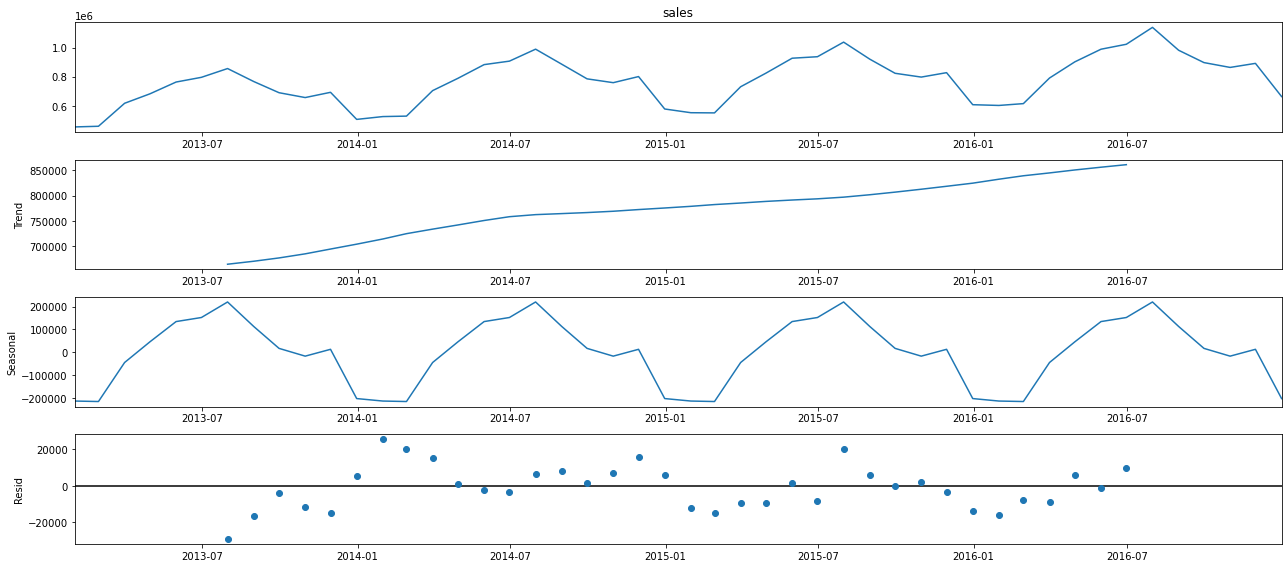

In [26]:
decomposition = sm.tsa.seasonal_decompose(salesbymonth_train, model='additive')
fig = decomposition.plot()
plt.show()

In [27]:
p = d = q = range(0, 2)

In [28]:
pdqa = list(itertools.product(p, d, q))

In [29]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [30]:
for param in pdqa:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(salesbymonth_train, order=param, seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)                                
            results = modl.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
# NOT Working

In [31]:
SARIMAMonth = sm.tsa.statespace.SARIMAX(salesbymonth, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12) ,enforce_stationarity=False,enforce_invertibility=False)

In [32]:
SARIMA_results_month = SARIMAMonth.fit()

C:\Users\alexd\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [33]:
print(SARIMA_results_month.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0119   2.03e-24  -4.99e+23      0.000      -1.012      -1.012
ma.L1          0.8282   3.09e-24   2.68e+23      0.000       0.828       0.828
ar.S.L12      -0.1358   2.08e-25  -6.52e+23      0.000      -0.136      -0.136
ma.S.L12   -1.024e+14   6.12e-33  -1.67e+46      0.000   -1.02e+14   -1.02e+14
sigma2       4.18e-15    3.3e-10   1.27e-05      1.000   -6.47e-10    6.47e-10


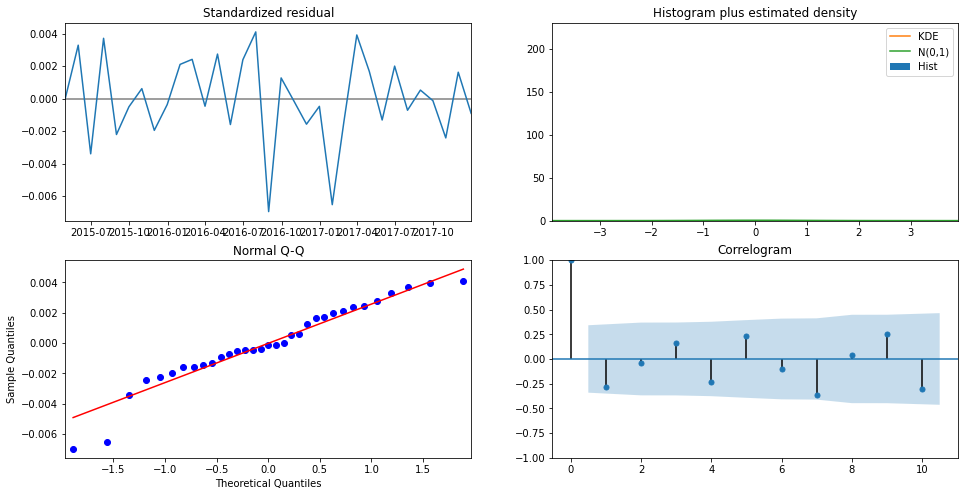

In [34]:
SARIMA_results_month.plot_diagnostics(figsize=(16, 8))
plt.show()


In [35]:
#SARIMA_predict_month_1 = SARIMA_results_month.predict(start=1461,end=1825) # this is from 1 Jan 2017 to 31 Dec 2017

In [36]:
#SARIMA_predict_month_1 = SARIMA_month_model.predict(start=48,end=60,rder=(1, 1, 1), seasonal_order=(1, 1, 1, 12) ,enforce_stationarity=False,enforce_invertibility=False) # this is from Jan 2017 to  Dec 2017

SARIMA_predict_month_1 = SARIMA_results_month.predict(start=48,end=60) #,order=(1, 1, 1), seasonal_order=(1, 1, 1, 12) ,enforce_stationarity=False,enforce_invertibility=False) # this is from Jan 2017 to  Dec 2017
print(SARIMA_predict_month_1)

2017-01-31    6.605898e+05
2017-02-28    6.307713e+05
2017-03-31    7.966812e+05
2017-04-30    9.277071e+05
2017-05-31    1.029407e+06
2017-06-30    1.051352e+06
2017-07-31    1.176139e+06
2017-08-31    1.022919e+06
2017-09-30    9.360949e+05
2017-10-31    9.071956e+05
2017-11-30    9.180577e+05
2017-12-31    7.011799e+05
2018-01-31    6.564426e+05
Freq: M, dtype: float64


In [37]:
salesbymonth_test_final['SeasonalARIMA'] = SARIMA_predict_month_1

In [38]:
salesbymonth_test_final.head()

,sales,SeasonalARIMA
date,,
2017-01-31,617306,6.605898e+05
2017-02-28,621369,6.307713e+05
2017-03-31,822667,7.966812e+05
2017-04-30,938862,9.277071e+05
2017-05-31,1020686,1.029407e+06


In [39]:
RMSE_Month_Seasonal_ARIMA  = np.mean(np.sqrt((salesbymonth_test_final['SeasonalARIMA'] - salesbymonth_test_final['sales']) ** 2)) 
print(RMSE_Month_Seasonal_ARIMA)

12808.889457925534


# AR by Month

In [40]:
model_ar_month = AR (salesbymonth_train)

C:\Users\alexd\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [41]:
model_ar_month_fit = model_ar_month.fit()

In [42]:
predictions_month_1 = model_ar_month_fit.predict(start=48,end=59)

In [43]:
AR_month_predictions=pd.DataFrame(predictions_month_1, columns =['AR'])

In [44]:
AR_month_predictions.head()

,AR
2017-01-31,605735.098158
2017-02-28,665165.171144
2017-03-31,863257.355139
2017-04-30,849575.834745
2017-05-31,946033.750945


In [45]:
salesbymonth_test.head(3)

date
2017-01-31    617306
2017-02-28    621369
2017-03-31    822667
Freq: M, Name: sales, dtype: int64

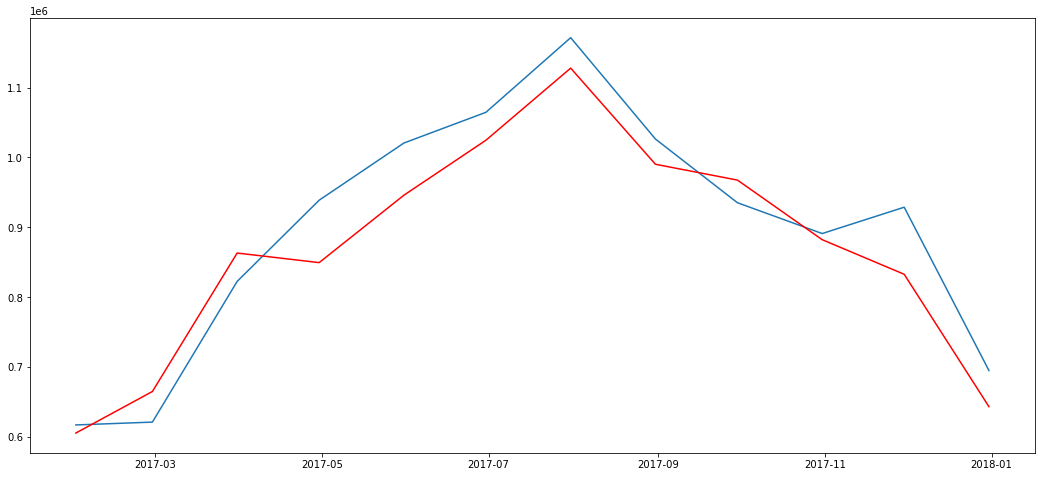

In [46]:
plt.plot(salesbymonth_test)
plt.plot(AR_month_predictions['AR'], color = 'red' )

In [47]:
salesbymonth_test_final['sales']

date
2017-01-31     617306
2017-02-28     621369
2017-03-31     822667
2017-04-30     938862
2017-05-31    1020686
2017-06-30    1064624
2017-07-31    1171393
2017-08-31    1026403
2017-09-30     935263
2017-10-31     891160
2017-11-30     928837
2017-12-31     695170
Freq: M, Name: sales, dtype: int64

In [48]:
salesbymonth_test_final['AR'] = AR_month_predictions['AR']

In [49]:
RMSE_Month_AR  = np.mean(np.sqrt((salesbymonth_test_final['AR'] - salesbymonth_test_final['sales']) ** 2)) 
print(RMSE_Month_AR)

47361.245114475176


In [50]:
salesbymonth_test_final['AR_error'] = salesbymonth_test_final['AR'] - salesbymonth_test_final['sales']
salesbymonth_test_final['AR_error_percent'] = salesbymonth_test_final['AR_error'] / salesbymonth_test_final['sales']

In [51]:
salesbymonth_test_final.sample(10)

,sales,SeasonalARIMA,AR,AR_error,AR_error_percent
date,,,,,
2017-12-31,695170,7.011799e+05,6.434593e+05,-51710.741026,-0.074386
2017-09-30,935263,9.360949e+05,9.676412e+05,32378.152980,0.034619
2017-10-31,891160,9.071956e+05,8.823820e+05,-8777.965365,-0.009850
2017-07-31,1171393,1.176139e+06,1.127842e+06,-43550.562522,-0.037178
2017-02-28,621369,6.307713e+05,6.651652e+05,43796.171144,0.070483
2017-01-31,617306,6.605898e+05,6.057351e+05,-11570.901842,-0.018744
2017-11-30,928837,9.180577e+05,8.328766e+05,-95960.364305,-0.103312
2017-05-31,1020686,1.029407e+06,9.460338e+05,-74652.249055,-0.073139
2017-08-31,1026403,1.022919e+06,9.902866e+05,-36116.431426,-0.035187


In [52]:
salesbymonth_test_final.sum()

sales               1.073374e+07
SeasonalARIMA       1.075810e+07
AR                  1.039893e+07
AR_error           -3.348056e+05
AR_error_percent   -3.299755e-01
dtype: float64

In [53]:
salesbymonth_test_final.head()

,sales,SeasonalARIMA,AR,AR_error,AR_error_percent
date,,,,,
2017-01-31,617306,6.605898e+05,605735.098158,-11570.901842,-0.018744
2017-02-28,621369,6.307713e+05,665165.171144,43796.171144,0.070483
2017-03-31,822667,7.966812e+05,863257.355139,40590.355139,0.049340
2017-04-30,938862,9.277071e+05,849575.834745,-89286.165255,-0.095100
2017-05-31,1020686,1.029407e+06,946033.750945,-74652.249055,-0.073139


In [54]:
salesbymonth_train.head()

date
2013-01-31    454904
2013-02-28    459417
2013-03-31    617382
2013-04-30    682274
2013-05-31    763242
Freq: M, Name: sales, dtype: int64

# SARIMA by day

In [55]:
decomposition_day = sm.tsa.seasonal_decompose(salesbyday_train, model='additive')

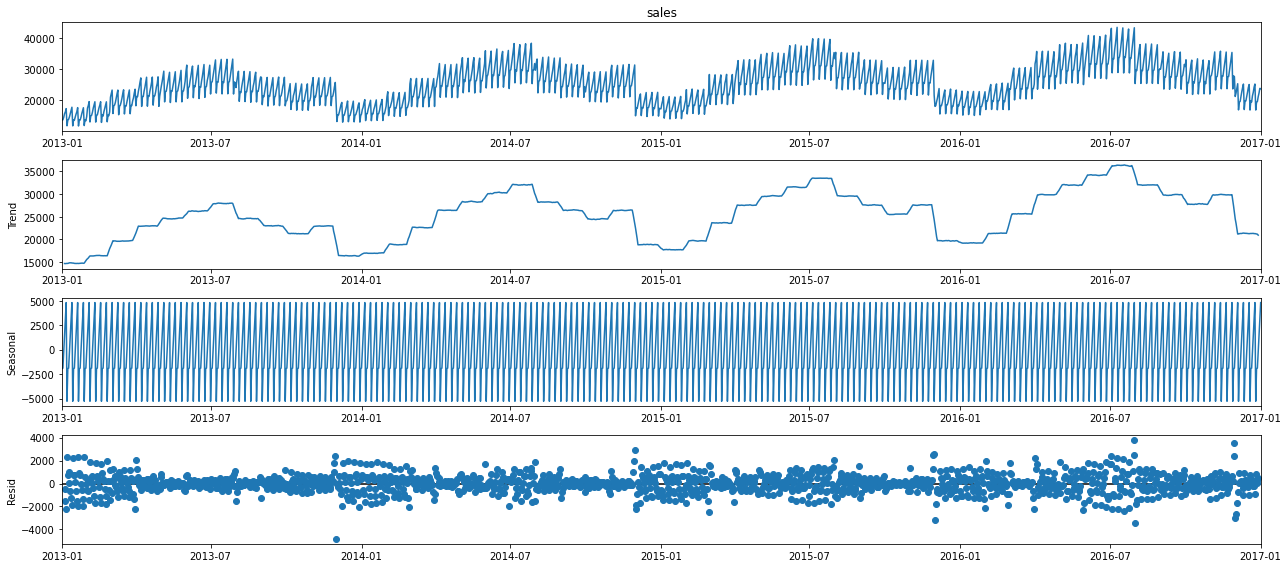

In [56]:
fig = decomposition_day.plot()
plt.show()


In [57]:
p = d = q = range(0, 2)

In [58]:

pdqb = list(itertools.product(p, d, q))
seasonal_pdq_day = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [59]:
for param in pdqb:
    for param_seasonal_day in seasonal_pdq_day:
        try:
            mod = sm.tsa.statespace.SARIMAX(salesbyday_train, order=param, seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)                                
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal_day, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:28452.992850156545
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:28452.992850156545
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:28452.992850156545
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:28452.992850156545
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:28452.992850156545
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:28452.992850156545
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:28452.992850156545
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:28452.992850156545
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:28182.714177347094
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:28182.714177347094
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:28182.714177347094
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:28182.714177347094
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:28182.714177347094
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:28182.714177347094
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:28182.714177347094
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:28182.714177347094
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:28357.725616254927
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:28357.72561

In [60]:
SARIMADay = sm.tsa.statespace.SARIMAX(salesbyday, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12) ,enforce_stationarity=False,enforce_invertibility=False)

In [61]:
SARIMA_results_day = SARIMADay.fit()

In [62]:
print(SARIMA_results_day.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8673      0.028    -31.004      0.000      -0.922      -0.812
ma.S.L12      -0.9760      0.020    -48.536      0.000      -1.015      -0.937
sigma2      3.954e+07   3.08e-11   1.28e+18      0.000    3.95e+07    3.95e+07


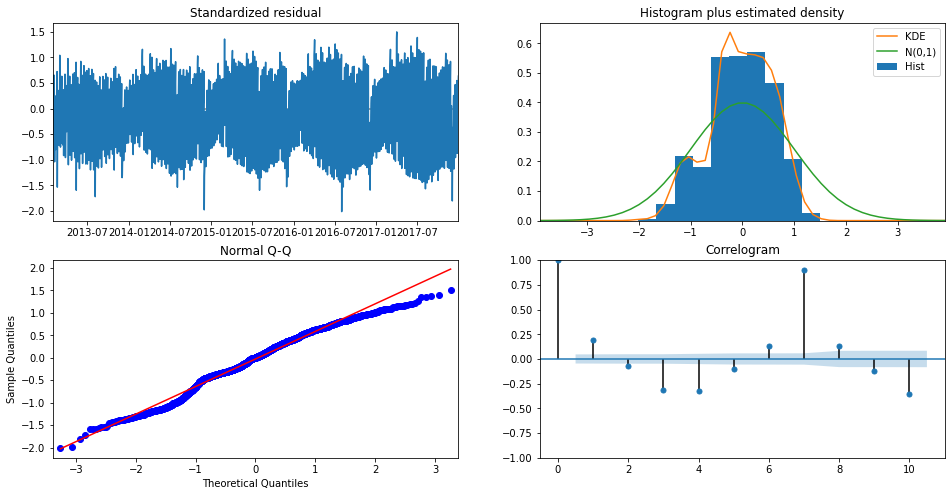

In [63]:
SARIMA_results_day.plot_diagnostics(figsize=(16, 8))
plt.show()


In [64]:
SARIMA_predict_day_1 = SARIMA_results_day.predict(start=1461,end=1825) # this is from 1 Jan 2017 to 31 Dec 2017
print(SARIMA_predict_day_1)


date
2017-01-01    21416.346400
2017-01-02    21858.568526
2017-01-03    20997.332078
2017-01-04    20962.677520
2017-01-05    20393.429813
                  ...     
2017-12-27    22150.027004
2017-12-28    21910.901883
2017-12-29    21957.617038
2017-12-30    22120.350057
2017-12-31    22433.232554
Freq: D, Length: 365, dtype: float64


In [65]:
salesbyday_test_final['SeasonalARIMA'] = SARIMA_predict_day_1


In [66]:
RMSE_Day_SeasonalARIMA  = np.mean(np.sqrt((salesbyday_test_final['SeasonalARIMA'] - salesbyday_test_final['sales']) ** 2)) 
print(RMSE_Day_SeasonalARIMA)

3464.770759102248


# ARIMA BY Month 


In [67]:
model_arima_month = ARIMA(salesbymonth_train, order = (7,1,0))

In [68]:
salesbymonth_train.tail(12)

date
2016-01-31     602439
2016-02-29     614957
2016-03-31     790881
2016-04-30     901950
2016-05-31     988730
2016-06-30    1022664
2016-07-31    1138718
2016-08-31     981494
2016-09-30     896831
2016-10-31     863637
2016-11-30     891448
2016-12-31     663411
Freq: M, Name: sales, dtype: int64

In [69]:
model_arima_month_fit = model_arima_month.fit()

In [70]:
arima_predictions_month = model_arima_month_fit.forecast(steps=12)[0]

In [71]:
print(arima_predictions_month)

[ 693901.23309806  769095.3473847   904797.34190754  891589.37516293
 1012396.10997902 1040230.33841161 1119180.59944552 1020207.05978916
  980122.81055833  881002.0995281   894061.47109239  807032.85327374]


In [72]:
ARIMA_month_predictions=pd.DataFrame(arima_predictions_month, columns =['ARIMA'])

In [73]:
ARIMA_month_predictions['ARIMA']

0     6.939012e+05
1     7.690953e+05
2     9.047973e+05
3     8.915894e+05
4     1.012396e+06
5     1.040230e+06
6     1.119181e+06
7     1.020207e+06
8     9.801228e+05
9     8.810021e+05
10    8.940615e+05
11    8.070329e+05
Name: ARIMA, dtype: float64

In [74]:
salesbymonth_test_final =salesbymonth_test_final.reset_index()

In [75]:
salesbymonth_test_final.head()

,date,sales,SeasonalARIMA,AR,AR_error,AR_error_percent
0,2017-01-31,617306,6.605898e+05,605735.098158,-11570.901842,-0.018744
1,2017-02-28,621369,6.307713e+05,665165.171144,43796.171144,0.070483
2,2017-03-31,822667,7.966812e+05,863257.355139,40590.355139,0.049340
3,2017-04-30,938862,9.277071e+05,849575.834745,-89286.165255,-0.095100
4,2017-05-31,1020686,1.029407e+06,946033.750945,-74652.249055,-0.073139


In [76]:
salesbymonth_test_final['ARIMA'] =ARIMA_month_predictions['ARIMA']

In [77]:
salesbymonth_test_final.tail(14)

,date,sales,SeasonalARIMA,AR,AR_error,AR_error_percent,ARIMA
0,2017-01-31,617306,6.605898e+05,6.057351e+05,-11570.901842,-0.018744,6.939012e+05
1,2017-02-28,621369,6.307713e+05,6.651652e+05,43796.171144,0.070483,7.690953e+05
2,2017-03-31,822667,7.966812e+05,8.632574e+05,40590.355139,0.049340,9.047973e+05
3,2017-04-30,938862,9.277071e+05,8.495758e+05,-89286.165255,-0.095100,8.915894e+05
4,2017-05-31,1020686,1.029407e+06,9.460338e+05,-74652.249055,-0.073139,1.012396e+06
5,2017-06-30,1064624,1.051352e+06,1.024679e+06,-39944.881314,-0.037520,1.040230e+06
6,2017-07-31,1171393,1.176139e+06,1.127842e+06,-43550.562522,-0.037178,1.119181e+06
7,2017-08-31,1026403,1.022919e+06,9.902866e+05,-36116.431426,-0.035187,1.020207e+06
8,2017-09-30,935263,9.360949e+05,9.676412e+05,32378.152980,0.034619,9.801228e+05
9,2017-10-31,891160,9.071956e+05,8.823820e+05,-8777.965365,-0.009850,8.810021e+05


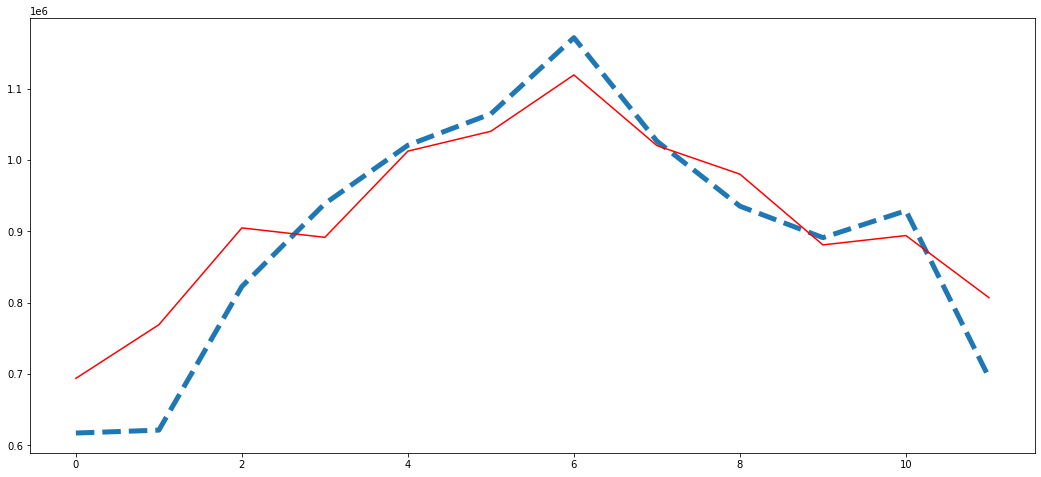

In [78]:
plt.plot(salesbymonth_test_final['sales'],linestyle='dashed',linewidth=5)
plt.plot(salesbymonth_test_final['ARIMA'], color = 'red' )


In [79]:
RMSE_Month_ARIMA  = np.mean(np.sqrt((salesbymonth_test_final['ARIMA'] - salesbymonth_test_final['sales']) ** 2)) 
print(RMSE_Month_ARIMA)

53872.71106780379


In [80]:
p=d=q =range(0,8)

In [81]:
pdqmontha = list(itertools.product(p,d,q))

In [82]:
# To check
#warnings.filterwarnings('ignore')
for param in pdqmontha:
    try:
        model_arima_month = ARIMA(salesbymonth_train, order = pdqmontha)
        model_arima_month_fit = model_arima_month.fit()
        print(param,model_arima_month_fit.aic)
    except:
        continue


# ARIMA per day - as per above

In [83]:
model_arima_day = ARIMA(salesbyday_train, order = (2,1,0))

In [84]:
model_arima_day_fit = model_arima_day.fit()

In [85]:
arima_predictions_day = model_arima_day_fit.forecast(steps=365)[0]

In [86]:
ARIMA_day_predictions=pd.DataFrame(arima_predictions_day, columns =['ARIMA'])

In [87]:
ARIMA_day_predictions['ARIMA']

0      23557.475471
1      23636.106629
2      23636.168952
3      23636.323115
4      23646.599407
           ...     
360    26085.873442
361    26092.726967
362    26099.580492
363    26106.434017
364    26113.287542
Name: ARIMA, Length: 365, dtype: float64

In [88]:
salesbyday_test_final =salesbyday_test_final.reset_index()

In [89]:
salesbyday_test_final['ARIMA'] = ARIMA_day_predictions['ARIMA']

In [90]:
salesbyday_test_final.head()

,date,sales,SeasonalARIMA,ARIMA
0,2017-01-01,23709,21416.346400,23557.475471
1,2017-01-02,15772,21858.568526,23636.106629
2,2017-01-03,18650,20997.332078,23636.168952
3,2017-01-04,18510,20962.677520,23636.323115
4,2017-01-05,19895,20393.429813,23646.599407


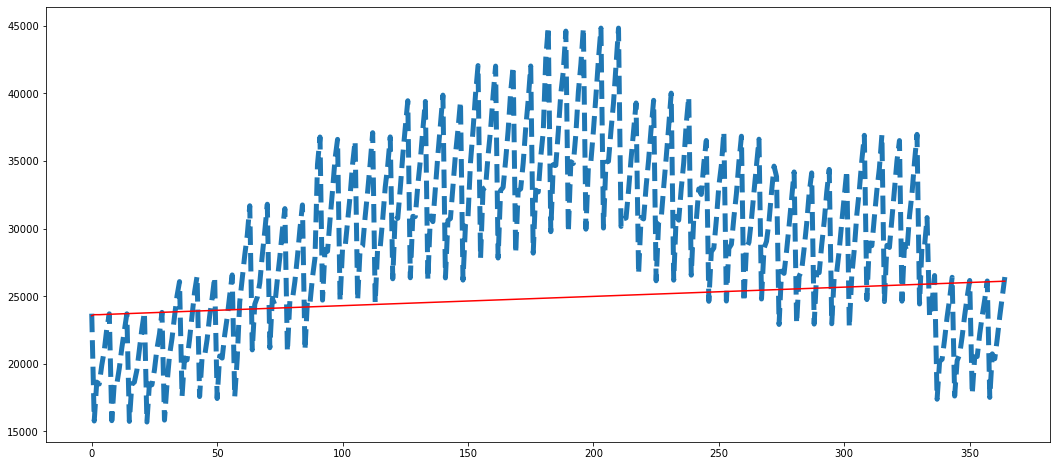

In [91]:
plt.plot(salesbyday_test_final['sales'],linestyle='dashed',linewidth=5)
plt.plot(salesbyday_test_final['ARIMA'], color = 'red' )


In [92]:
p=d=q =range(0,5)

In [93]:
pdqday = list(itertools.product(p,d,q))

In [94]:
# To check
warnings.filterwarnings('ignore')
for param in pdqday:
    try:
        model_arima_month = ARIMA(salesbymonth_train, order = param)
        model_arima_month_fit = model_arima_month.fit()
        print(param,model_arima_month_fit.aic)
    except:
        continue


(0, 0, 0) 1292.3700483098567
(0, 0, 1) 1266.3682906156405
(0, 0, 2) 1241.5597026607793
(0, 0, 3) 1242.6052268002845
(0, 0, 4) 1231.557476369871
(0, 1, 0) 1222.917698590096
(0, 1, 1) 1223.660829367225
(0, 1, 2) 1224.0635142992949
(0, 1, 3) 1216.1604014911384
(0, 1, 4) 1215.9703074171275
(0, 2, 0) 1217.4472892188855
(0, 2, 1) 1202.7274294871388
(0, 2, 2) 1203.3519695954424
(0, 2, 3) 1203.5166247898137
(0, 2, 4) 1207.9788527349117
(1, 0, 0) 1247.7641694480762
(1, 0, 1) 1247.0764244191082
(1, 0, 2) 1244.1019354163955
(1, 0, 3) 1244.8283393165339
(1, 0, 4) 1228.6809142259885
(1, 1, 0) 1223.1877471761138
(1, 2, 0) 1207.9432158880209
(1, 2, 1) 1197.694150267475
(1, 2, 3) 1177.7358883021561
(1, 2, 4) 1179.708348885369
(2, 0, 0) 1244.3757831942335
(2, 0, 1) 1240.4602630678846
(2, 0, 2) 1236.7740432966816
(2, 0, 3) 1231.9044343578012
(2, 0, 4) 1230.1172381365122
(2, 1, 0) 1224.2863588382847
(2, 2, 0) 1209.7262978232895
(2, 2, 1) 1220.8853328294556
(3, 0, 0) 1240.4983409958495
(3, 0, 1) 1241.0107

In [95]:
ARIMA_day_predictions.tail()

,ARIMA
360,26085.873442
361,26092.726967
362,26099.580492
363,26106.434017
364,26113.287542


In [96]:
RMSE_Day_ARIMA  = np.mean(np.sqrt((salesbyday_test_final['ARIMA'] - salesbyday_test_final['sales']) ** 2))
print(RMSE_Day_ARIMA)

6335.689426321457


In [97]:
salesbyday_test_final.shape

(365, 4)

# AR by Day 

In [98]:
model_ar_day = AR (salesbyday_train)

In [99]:
model_ar_day_fit = model_ar_day.fit()

In [100]:
predictions_day_1 = model_ar_day_fit.predict(start=1461,end=1825)

In [101]:
predictions_day_1.head()

2017-01-01    24876.025870
2017-01-02    15729.296835
2017-01-03    18572.547994
2017-01-04    18686.438272
2017-01-05    20418.203622
Freq: D, dtype: float64

In [102]:
AR_day_predictions=pd.DataFrame(predictions_day_1, columns =['AR'])

In [103]:
AR_day_predictions.shape

(365, 1)

In [104]:
AR_day_predictions.head()

,AR
2017-01-01,24876.025870
2017-01-02,15729.296835
2017-01-03,18572.547994
2017-01-04,18686.438272
2017-01-05,20418.203622


In [105]:
salesbyday_test_final['sales']

0      23709
1      15772
2      18650
3      18510
4      19895
       ...  
360    20378
361    21885
362    23535
363    24988
364    26420
Name: sales, Length: 365, dtype: int64

In [106]:
salesbyday_test_final.head()

,date,sales,SeasonalARIMA,ARIMA
0,2017-01-01,23709,21416.346400,23557.475471
1,2017-01-02,15772,21858.568526,23636.106629
2,2017-01-03,18650,20997.332078,23636.168952
3,2017-01-04,18510,20962.677520,23636.323115
4,2017-01-05,19895,20393.429813,23646.599407


In [107]:
salesbyday_test_final = salesbyday_test_final.set_index('date')

In [108]:
AR_day_predictions.shape

(365, 1)

In [109]:
salesbyday_test_final['AR'] = AR_day_predictions['AR']

In [110]:
salesbyday_test_final.head()

,sales,SeasonalARIMA,ARIMA,AR
date,,,,
2017-01-01,23709,21416.346400,23557.475471,24876.025870
2017-01-02,15772,21858.568526,23636.106629,15729.296835
2017-01-03,18650,20997.332078,23636.168952,18572.547994
2017-01-04,18510,20962.677520,23636.323115,18686.438272
2017-01-05,19895,20393.429813,23646.599407,20418.203622


In [111]:
#salesbyday_test_final = salesbyday_test_final.set_index('date')

In [112]:
RMSE_Day_AR  = np.mean(np.sqrt((salesbyday_test_final['AR'] - salesbyday_test_final['sales']) ** 2))
print(RMSE_Day_AR)

5810.887398116792


In [113]:
salesbyday_test_final['AR_error'] = salesbyday_test_final['AR'] - salesbyday_test_final['sales']

In [114]:
salesbyday_test_final['AR_error_percent'] = salesbyday_test_final['AR_error'] / salesbyday_test_final['sales']

In [115]:
salesbyday_test_final.head(12)

,sales,SeasonalARIMA,ARIMA,AR,AR_error,AR_error_percent
date,,,,,,
2017-01-01,23709,21416.346400,23557.475471,24876.025870,1167.025870,0.049223
2017-01-02,15772,21858.568526,23636.106629,15729.296835,-42.703165,-0.002708
2017-01-03,18650,20997.332078,23636.168952,18572.547994,-77.452006,-0.004153
2017-01-04,18510,20962.677520,23636.323115,18686.438272,176.438272,0.009532
2017-01-05,19895,20393.429813,23646.599407,20418.203622,523.203622,0.026298
2017-01-06,20994,20190.150458,23653.018816,21761.275610,767.275610,0.036547
2017-01-07,22591,20187.785837,23659.594766,23399.604644,808.604644,0.035793
2017-01-08,23700,20556.179069,23666.609851,24039.244849,339.244849,0.014314
2017-01-09,15797,21098.500457,23673.437889,16038.615333,241.615333,0.015295


In [116]:
salesbyday_test_final.sum()

sales               1.073374e+07
SeasonalARIMA       1.073870e+07
ARIMA               9.076021e+06
AR                  8.889515e+06
AR_error           -1.844225e+06
AR_error_percent   -5.291311e+01
dtype: float64

In [117]:
salesbymonth_test_final.sum()

sales               1.073374e+07
SeasonalARIMA       1.075810e+07
AR                  1.039893e+07
AR_error           -3.348056e+05
AR_error_percent   -3.299755e-01
ARIMA               1.101362e+07
dtype: float64

In [118]:
salesbyday_test_final.reset_index()

,date,sales,SeasonalARIMA,ARIMA,AR,AR_error,AR_error_percent
0,2017-01-01,23709,21416.346400,23557.475471,24876.025870,1167.025870,0.049223
1,2017-01-02,15772,21858.568526,23636.106629,15729.296835,-42.703165,-0.002708
2,2017-01-03,18650,20997.332078,23636.168952,18572.547994,-77.452006,-0.004153
3,2017-01-04,18510,20962.677520,23636.323115,18686.438272,176.438272,0.009532
4,2017-01-05,19895,20393.429813,23646.599407,20418.203622,523.203622,0.026298
...,...,...,...,...,...,...,...
360,2017-12-27,20378,22150.027004,26085.873442,24332.211819,3954.211819,0.194043
361,2017-12-28,21885,21910.901883,26092.726967,25759.491742,3874.491742,0.177039
362,2017-12-29,23535,21957.617038,26099.580492,26859.473994,3324.473994,0.141257
363,2017-12-30,24988,22120.350057,26106.434017,28061.104079,3073.104079,0.122983


In [119]:
# Plotting 

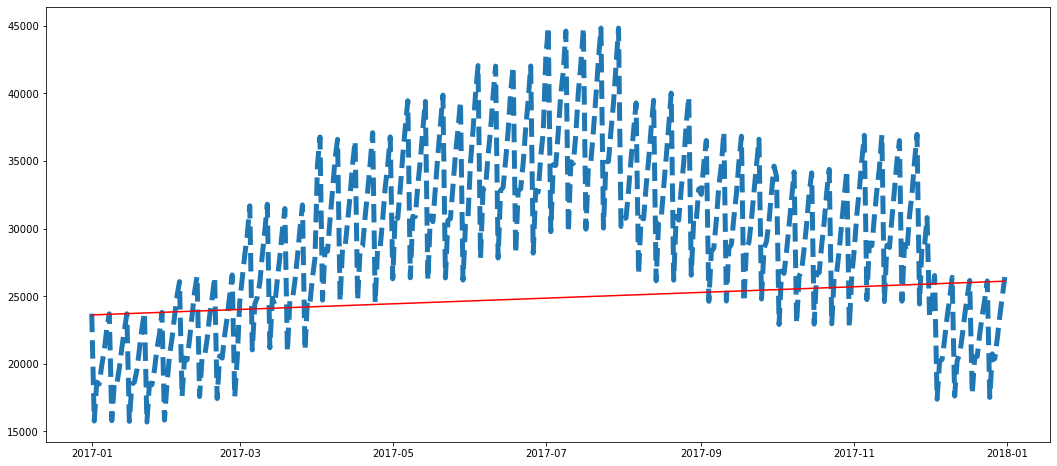

In [120]:
plt.plot(salesbyday_test_final['sales'],linestyle='dashed',linewidth=5)
plt.plot(salesbyday_test_final['ARIMA'], color = 'red' )


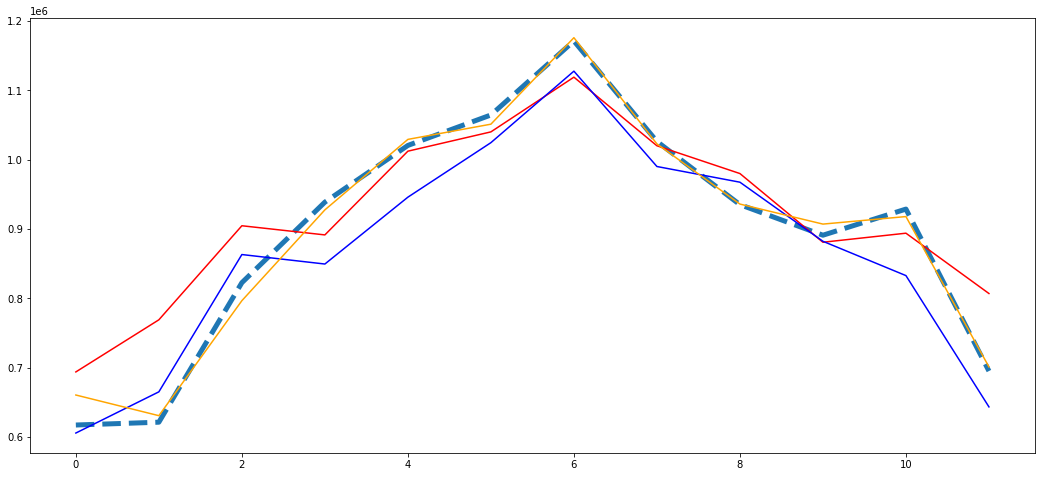

In [121]:
plt.plot(salesbymonth_test_final['sales'],linestyle='dashed',linewidth=5)
plt.plot(salesbymonth_test_final['ARIMA'], color = 'red' )
plt.plot(salesbymonth_test_final['AR'], color = 'blue' )
plt.plot(salesbymonth_test_final['SeasonalARIMA'], color = 'orange' )